# Snake and Ladders

[문제 pdf](https://file.notion.so/f/f/c17c7a0a-829a-4418-bd5b-6416682a77fa/b20d8b98-dba8-49fc-800b-b5e8aeb7c687/1._Quantum_Chutes_and_Ladders_for_SKKU_v2_%EB%B2%88%EC%97%AD_(1).pdf?id=b5b448ae-a6ca-473b-9183-dc3f97b005ed&table=block&spaceId=c17c7a0a-829a-4418-bd5b-6416682a77fa&expirationTimestamp=1705968000000&signature=u9-bzL7guPLMa18PBDechdqg4e4q5FY9cJDDTk06r9Q&downloadName=%EB%AC%B8%EC%A0%9C.pdf)

#Preparation


In [ ]:
!pip install pennylane pennylane-qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install pylatexenc #MPL 사용

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ea329193fbaf21ef69f64439aacc97435cb1a2cade83d1f4c2bce059261f5fbc
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import pennylane as qml

In [ ]:
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from pylatexenc import *
from IPython.display import display

In [ ]:
import numpy as np
import random
import math

##Quantum Coin (PennyLane)

In [ ]:
# Device Initialization
def init_device(n:int):
  '''
    TODO :
    Args :
    Return :
  '''
  dev = qml.device("default.qubit",wires=n)
  return dev

In [ ]:
n = 1
dev = init_device(n)

In [ ]:
@qml.qnode(dev)
def q_coin(n):
  for i in range(n):
    qml.Hadamard(i)
  return qml.state()

(<Figure size 400x200 with 1 Axes>, <Axes: >)

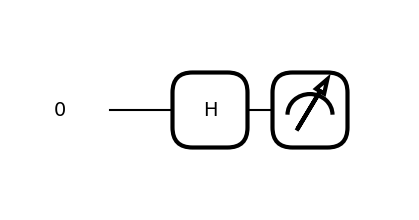

In [ ]:
qml.draw_mpl(q_coin)(1)

In [ ]:
qmq_coin(1)

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

#Qiskit-Coin

In [ ]:
def circuit_init(q, c=0):
  circuit = QuantumCircuit(q, c)
  return circuit

def quantum_coin(circuit, num_of_case):
  '''
  TODO : Apply Hadamard for make Superposition like Coin

  Args :
    circuit (QuantumCircuit) : Quantum Circuit to apply the operation
    num_of_case (int) : Power of 2, num of Possible Cases

  Return : None (Just Apply the gates to circuit)
  '''

  size = math.ceil(np.log2(num_of_case))
  for i in range(size):
    circuit.h(i)

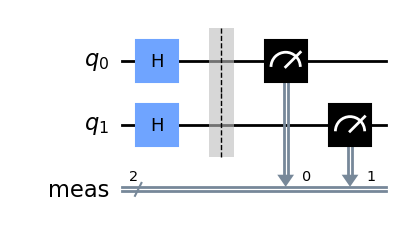

In [ ]:
n = 2
circuit = circuit_init(n)
quantum_coin(circuit, 2**n)
circuit.measure_all()
circuit.draw('mpl')

{'00': 267, '10': 277, '11': 224, '01': 256}


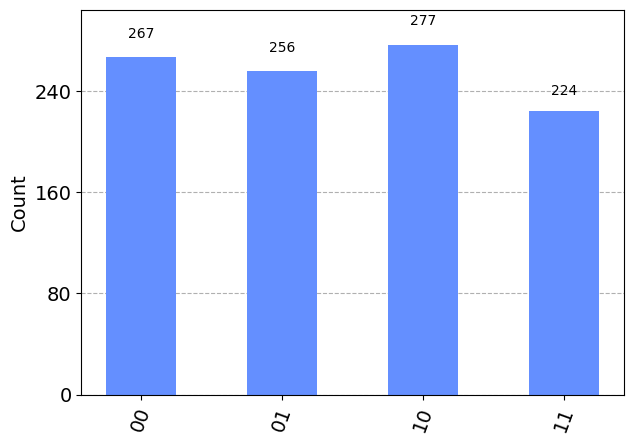

In [ ]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

#Board

In [ ]:
def quantum_board(circuit, num_of_box):
  new_quantum_register = QuantumRegister(num_of_box)
  circuit.add_register(new_quantum_register)


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister

# 기존 큐비트가 있는 QuantumCircuit
qc = QuantumCircuit(2)

# 큐비트 레지스터 추가
additional_qubits = 3
qr = QuantumRegister(additional_qubits)
qc.add_register(qr)

# 새로운 큐비트를 사용한 어떤 작업 수행
qc.h(qr[0])  # 예시로 Hadamard 게이트를 추가한 것입니다.


#with Class

In [ ]:
class Q_Snakes_Ladders:
  def __init__(self, num_of_possible, num_of_box):
    ## Initialize for instances of this class ##
    '''
      num_of_possible(int) : power of 2, number of possible cases of Coin(Dice)
      num_of_box(int) : number of boxes in board, (n * n)
    '''
    self.num_of_possible = math.ceil(np.log2(num_of_possible))
    self.num_of_box = math.ceil(num_of_box ** 0.5)
    self.circuit = QuantumCircuit(self.num_of_possible + self.num_of_box, self.num_of_possible + self.num_of_box)

    ## Initialize of Position Qubit (1 for 0th box qubit) ##
    self.circuit.x(self.num_of_possible)

  def roll_dice(self):
    for i in range(self.num_of_possible):
      self.circuit.h(i)

  def create_l_shift():


  def print_circuit(self):
    display(self.circuit.draw('mpl'))


/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


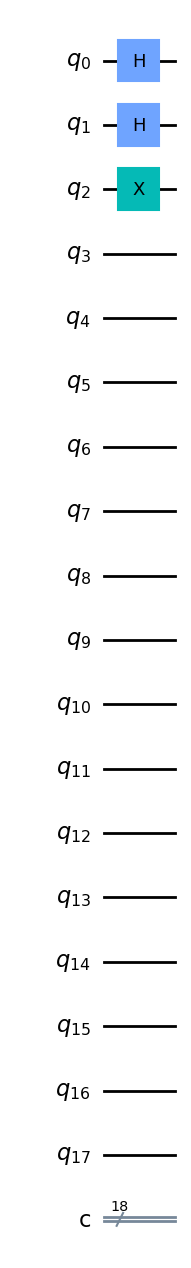

In [ ]:
qs = Q_Snakes_Ladders(4, 16)
qs.roll_dice()
qs.print_circuit()

# Solution with 4 x 4 board and 2 possiblities for coin

In [ ]:
class Q_Snakes_Ladders:
  def __init__(self, num_of_possible = 2, num_of_box = 16):
    ## Initialize for instances of this class ##
    '''
      num_of_possible(int) : power of 2, number of possible cases of Coin(Dice)
      num_of_box(int) : number of boxes in board, (n * n)
    '''
    self.num_of_possible = math.ceil(np.log2(num_of_possible))
    self.num_of_box = math.ceil(num_of_box ** 0.5)
    self.circuit = QuantumCircuit(self.num_of_possible + self.num_of_box, self.num_of_possible + self.num_of_box)

    ## Initialize of Position Qubit (1 for 0th box qubit) ##
    #self.circuit.x(self.num_of_possible)

  def roll_dice(self):
    for i in range(self.num_of_possible):
      self.circuit.h(i)

  def create_l_shift(self):
    # Create a subcircuit
    n = self.num_of_box
    l_shift_circ = QuantumCircuit(n, name = 'L-shift-{}'.format(n))

    # Add L-shift Operatioins to the subcircuit
    zero_to_n = list(range(n))
    for i in range(n-1,1,-1):
      l_shift_circ.mcx(zero_to_n[:i], i)
    l_shift_circ.cx(0, 1)
    l_shift_circ.x(0)
    display(l_shift_circ.draw('mpl'))
    #return l_shift_circ
    #Convert the subcircuit into a gate
    l_shift_gate = l_shift_circ.to_gate()
    return l_shift_gate

  def print_circuit(self):
    display(self.circuit.draw('mpl'))


In [ ]:
qs = Q_Snakes_Ladders(2, 16)
qs.roll_dice()
qs.print_circuit()

#Task 5

상태를 측정하면 중첩 상태가 중간에 깨져서 그 이후의 과정이 고전의 과정과 같게 될 것이다.

고전 게임의 "메모리 없는" 특성은 양자적 비유로 설명하자면,
먼저 고전 게임의 Non-memory 경우는 마지막의 결과를 통해 중간 과정을 확인할 수 없는데, 이는 양자 게임에서 중간 과정의 측정을 생략한 것과 같다.

# Test

In [ ]:
not_mat = np.array([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])
cnot_mat = np.array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])
ccnot_mat = np.array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])
not_mat @ cnot_mat @ ccnot_mat

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In [ ]:
### Check Unitary of L-Shift ###
backend = Aer.get_backend('unitary_simulator')
test = Q_Snakes_Ladders()
l_shift_gate = test.create_l_shift()  # 수정: l_shift_gate로 저장
#c_l_shift_gate = l_shift_gate.control(1)
test_circuit = QuantumCircuit(4,0)
test_circuit.append(l_shift_gate, [0,1,2,3])
test_circuit.draw('mpl')

job = execute(test_circuit, backend, shots=8192)
result = job.result()

print(result.get_unitary(test_circuit,3))


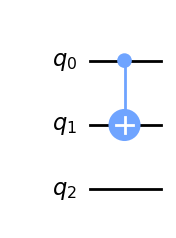

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


In [ ]:
backend = Aer.get_backend('unitary_simulator')

cnot_circuit = QuantumCircuit(3,0)
cnot_circuit.cx(0, 1)
display(cnot_circuit.draw('mpl'))

job = execute(cnot_circuit, backend, shots=8192)
result = job.result()

print(result.get_unitary(cnot_circuit,3))

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


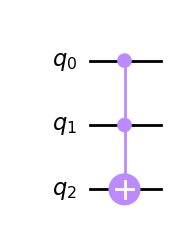

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


In [ ]:
backend = Aer.get_backend('unitary_simulator')

ccnot_circuit = QuantumCircuit(3,0)
ccnot_circuit.mcx([0, 1], 2)
display(ccnot_circuit.draw('mpl'))

job = execute(ccnot_circuit, backend, shots=8192)
result = job.result()

U = result.get_unitary(ccnot_circuit,3)
U

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


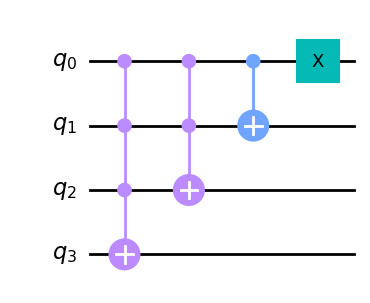

Instruction(name='L-shift-4', num_qubits=4, num_clbits=0, params=[])

In [ ]:
test = Q_Snakes_Ladders()
test.create_l_shift()